In [87]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
import numpy as np

In [88]:
# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

In [89]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [90]:
# Cargamos los datos del AUSTRALIAN GRAND PRIX 2025 (Qualifying)
qualy = f1.get_session(2025, 1, 'Q')
qualy.event.OfficialEventName

'FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX 2025'

In [91]:
# Cargamos la informacion de la clasificacion
qualy.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


## Diferencia de la vuelta más rapida de cada piloto con la vuelta de pole

In [92]:
# Armamos un Pandas con todos los pilotos
drivers = pd.unique(qualy.laps['Driver'])
print(drivers)

# Seleccionamos la vuelta más rapida de cada piloto, las ordenamos y las reseteamos
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = qualy.laps.pick_drivers(drv).pick_fastest()
    if drvs_fastest_lap is not None:  # Check if a valid lap is returned
        list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)
    
# Calculamos la diferencia de tiempo con la vuelta de pole
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

['NOR' 'PIA' 'VER' 'RUS' 'TSU' 'ALB' 'LEC' 'HAM' 'GAS' 'SAI' 'HAD' 'ALO'
 'STR' 'DOO' 'BOR' 'ANT' 'HUL' 'LAW' 'OCO' 'BEA']


In [93]:
# Mostramos la tabla obtenida
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:15.096000        0 days 00:00:00
1     PIA 0 days 00:01:15.180000 0 days 00:00:00.084000
2     VER 0 days 00:01:15.481000 0 days 00:00:00.385000
3     RUS 0 days 00:01:15.546000 0 days 00:00:00.450000
4     TSU 0 days 00:01:15.670000 0 days 00:00:00.574000
5     ALB 0 days 00:01:15.737000 0 days 00:00:00.641000
6     LEC 0 days 00:01:15.755000 0 days 00:00:00.659000
7     HAM 0 days 00:01:15.919000 0 days 00:00:00.823000
8     SAI 0 days 00:01:15.931000 0 days 00:00:00.835000
9     GAS 0 days 00:01:15.980000 0 days 00:00:00.884000
10    HAD 0 days 00:01:16.175000 0 days 00:00:01.079000
11    ALO 0 days 00:01:16.288000 0 days 00:00:01.192000
12    DOO 0 days 00:01:16.315000 0 days 00:00:01.219000
13    STR 0 days 00:01:16.369000 0 days 00:00:01.273000
14    BOR 0 days 00:01:16.516000 0 days 00:00:01.420000
15    ANT 0 days 00:01:16.525000 0 days 00:00:01.429000
16    HUL 0 days 00:01:16.579000 0 days 00:00:01

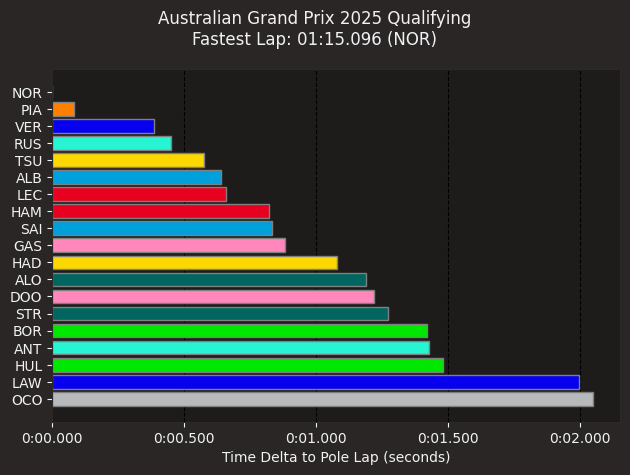

In [94]:
# Inicializamos una lista de colores para cada equipo
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=qualy)
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# Invertimos el eje y para que el piloto más rápido esté en la parte superior
ax.invert_yaxis()

# Mostramos lineas de la cuadrícula
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

ax.set_xlabel('Time Delta to Pole Lap (seconds)')
plt.suptitle(f"{qualy.event['EventName']} {qualy.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/timedelta_polelap.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Sectores más rapidos

In [95]:
pilotos = [
    qualy.laps.pick_drivers('NOR').pick_fastest(),
    qualy.laps.pick_drivers('PIA').pick_fastest(),
    qualy.laps.pick_drivers('VER').pick_fastest(),
    qualy.laps.pick_drivers('RUS').pick_fastest(),
    qualy.laps.pick_drivers('TSU').pick_fastest(),
    qualy.laps.pick_drivers('ALB').pick_fastest(),
    qualy.laps.pick_drivers('LEC').pick_fastest(),
    qualy.laps.pick_drivers('HAM').pick_fastest(),
    qualy.laps.pick_drivers('SAI').pick_fastest(),
    qualy.laps.pick_drivers('GAS').pick_fastest(),
    qualy.laps.pick_drivers('HAD').pick_fastest(),
    qualy.laps.pick_drivers('ALO').pick_fastest(),
    qualy.laps.pick_drivers('DOO').pick_fastest(),
    qualy.laps.pick_drivers('STR').pick_fastest(),
    qualy.laps.pick_drivers('BOR').pick_fastest(),
    qualy.laps.pick_drivers('ANT').pick_fastest(),
    qualy.laps.pick_drivers('HUL').pick_fastest(),
    qualy.laps.pick_drivers('LAW').pick_fastest(),
    qualy.laps.pick_drivers('OCO').pick_fastest(),
    qualy.laps.pick_drivers('BEA').pick_fastest()    
    ]

In [96]:
# Filtramos los valores None de la lista de pilotos
valid_pilotos = [lap for lap in pilotos if lap is not None]

# Extraemos los tiempos de cada sector para cada piloto
sector1_times = [lap['Sector1Time'].total_seconds() for lap in valid_pilotos]
sector2_times = [lap['Sector2Time'].total_seconds() for lap in valid_pilotos]
sector3_times = [lap['Sector3Time'].total_seconds() for lap in valid_pilotos]
drivers = [lap['Driver'] for lap in valid_pilotos]

C:\Users\Laura\AppData\Local\Temp\ipykernel_12596\1169442245.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_12596\1169442245.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_12596\1169442245.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(sorted_drivers_s3, rotation=45)


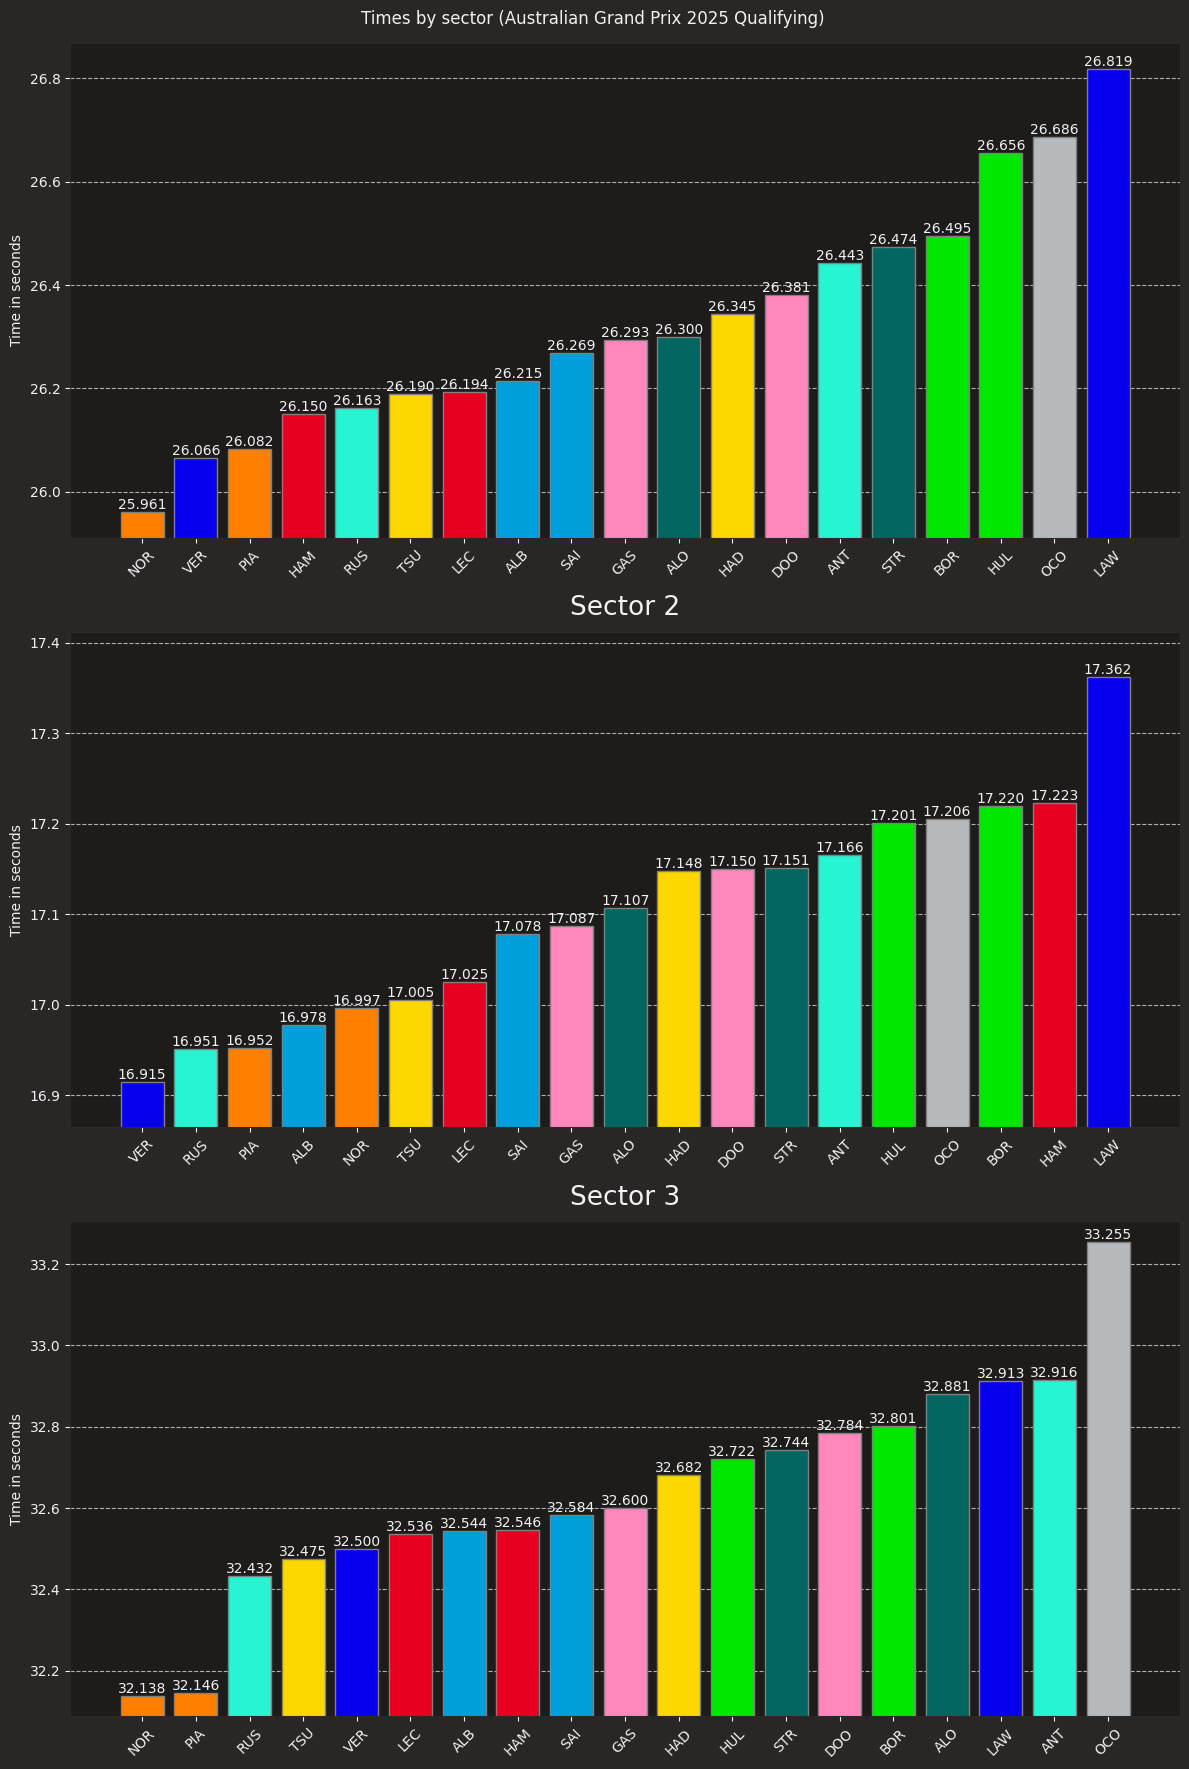

In [97]:
# Configuramos el gráfico de barras
x = np.arange(len(drivers))  # la posición de los pilotos en el eje x

# Ordenamos los tiempos de cada sector de menor a mayor
sorted_indices_s1 = np.argsort(sector1_times)
sorted_indices_s2 = np.argsort(sector2_times)
sorted_indices_s3 = np.argsort(sector3_times)

# Reordenamos los tiempos y los pilotos
sorted_sector1_times = np.array(sector1_times)[sorted_indices_s1]
sorted_sector2_times = np.array(sector2_times)[sorted_indices_s2]
sorted_sector3_times = np.array(sector3_times)[sorted_indices_s3]
sorted_drivers_s1 = np.array(drivers)[sorted_indices_s1]
sorted_drivers_s2 = np.array(drivers)[sorted_indices_s2]
sorted_drivers_s3 = np.array(drivers)[sorted_indices_s3]
sorted_team_colors_s1 = np.array(team_colors)[sorted_indices_s1]
sorted_team_colors_s2 = np.array(team_colors)[sorted_indices_s2]
sorted_team_colors_s3 = np.array(team_colors)[sorted_indices_s3]

# Creamos un gráfico con 3 subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle(f'Times by sector ({qualy.event["EventName"]} {qualy.event.year} Qualifying) \n')

# Gráfico para el Sector 1
bars1 = ax1.bar(sorted_drivers_s1, sorted_sector1_times, color=sorted_team_colors_s1, edgecolor='grey')
ax1.set_ylabel('Time in seconds')
ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
ax1.set_ylim(sorted_sector1_times[0] - 0.05, sorted_sector1_times[-1] + 0.05)
ax1.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars1, sorted_sector1_times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 2
bars2 = ax2.bar(sorted_drivers_s2, sorted_sector2_times, color=sorted_team_colors_s2, edgecolor='grey')
ax2.set_ylabel('Time in seconds')
ax2.set_title('Sector 2')
ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
ax2.set_ylim(sorted_sector2_times[0] - 0.05, sorted_sector2_times[-1] + 0.05)
ax2.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars2, sorted_sector2_times):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 3
bars3 = ax3.bar(sorted_drivers_s3, sorted_sector3_times, color=sorted_team_colors_s3, edgecolor='grey')
ax3.set_ylabel('Time in seconds')
ax3.set_title('Sector 3')
ax3.set_xticklabels(sorted_drivers_s3, rotation=45)
ax3.set_ylim(sorted_sector3_times[0] - 0.05, sorted_sector3_times[-1] + 0.05)
ax3.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars3, sorted_sector3_times):
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Ajustamos el layout para que no se solapen los subgráficos
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/tiempos_sectores.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Velocidad maxima conseguida por cada piloto

In [98]:
# Lista donde guardaremos los datos de velocidad maxima obtenida por cada piloto y el estado del DRS
tel_pilotos = []

# Filtramos los valores None de la lista de pilotos
valid_pilotos = [piloto for piloto in pilotos if piloto is not None]

# Como ya tenemos una lista que contiene la vuelta más rapida de cada piloto, vamos a iterar sobre ella
#para extraer la telemetria de cada piloto y obtener la velocidad máxima y el estado del DRS
for piloto in valid_pilotos:
    aux = piloto.get_car_data().add_distance()
    pilot = piloto["Driver"]
    maximo = aux["Speed"].max()
    minimo = aux["Speed"].min()
    drs_status_max = aux.loc[aux['Speed'] == maximo, 'DRS'].values
    drs_status_min = aux.loc[aux['Speed'] == minimo, 'DRS'].values

    # Condicionales para identificar el estado del DRS en velocidad maxima
    if (drs_status_max == 8).any():
        drs_max = "Desactivado"
    elif np.isin(drs_status_max, [10, 12, 14]).any():
        drs_max = "Activado"
    else:
        drs_max = "Desconocido"
        
    # Condicionales para identificar el estado del DRS en velocidad minima
    if (drs_status_min == 8).any():
        drs_min = "Desactivado"
    elif np.isin(drs_status_min, [10, 12, 14]).any():
        drs_min = "Activado"
    else:
        drs_min = "Desconocido"
        
    # Finalmente añadimos los datos a la lista
    tel_pilotos.append([pilot, maximo, drs_max, minimo, drs_min])

In [99]:
# Ordenamos la lista tel_pilotos por la velocidad máxima
tel_pilotos_sorted = sorted(tel_pilotos, key=lambda x: x[1], reverse=True)

# Invertir el orden de los datos para que sea de mayor a menor en el grafico
tel_pilotos_sorted.reverse()

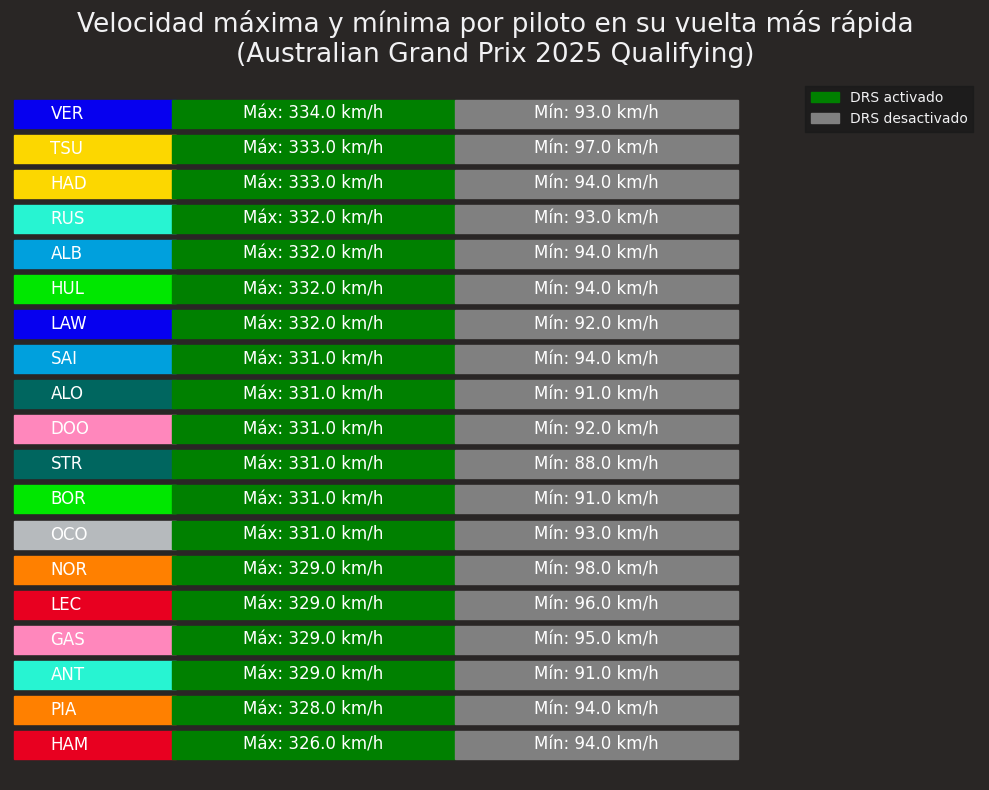

In [105]:
fig, ax = plt.subplots(figsize=(10, 8))

# Definir los colores para el DRS activado y desactivado
drs_colors = {'Activado': 'green', 'Desactivado': 'grey', 'Desconocido': 'grey'}

# Iterar sobre los datos de los pilotos y sus velocidades
for i, (pilot, speed, drs_max, speed_low, drs_min) in enumerate(tel_pilotos_sorted):
    
    # Obtener el color del equipo del piloto
    team_color = fastf1.plotting.get_team_color(qualy.laps.pick_drivers(pilot).pick_fastest()['Team'], session=qualy)
    
    # Dibujar el rectángulo con el nombre del piloto
    ax.add_patch(plt.Rectangle((0.1, i-0.4), 4, 0.8, color=team_color))
    ax.text(1, i, pilot, va='center', ha='left', fontsize=12, color='white')
    
    # Dibujar el rectángulo con la velocidad maxima
    rect_color = drs_colors[drs_max]
    ax.add_patch(plt.Rectangle((4, i-0.4), 7, 0.8, color=rect_color))
    
    # Dibujar el rectángulo con la velocidad minima
    rect_color = drs_colors[drs_min]
    ax.add_patch(plt.Rectangle((11, i-0.4), 7, 0.8, color=rect_color))
    
    # Dibujar la velocidad máxima y mínima dentro del rectángulo
    ax.text(4 + 3.5, i, f'Máx: {speed} km/h', va='center', ha='center', fontsize=12, color='white')
    ax.text(4 + 10.5, i, f'Mín: {speed_low} km/h', va='center', ha='center', fontsize=12, color='white')

# Configurar gráfico
ax.title.set_text(f'Velocidad máxima y mínima por piloto en su vuelta más rápida\n({qualy.event["EventName"]} {qualy.event.year} Qualifying)')
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='green', label='DRS activado'),
                   plt.Rectangle((0, 0), 1, 1, color='grey', label='DRS desactivado')],
            loc='upper right')
ax.set_xlim(0, 24)
ax.set_ylim(-1, len(tel_pilotos_sorted))
ax.axis('off')

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/vel_max_min.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Comparaciones entre las vueltas rapidas de cada piloto

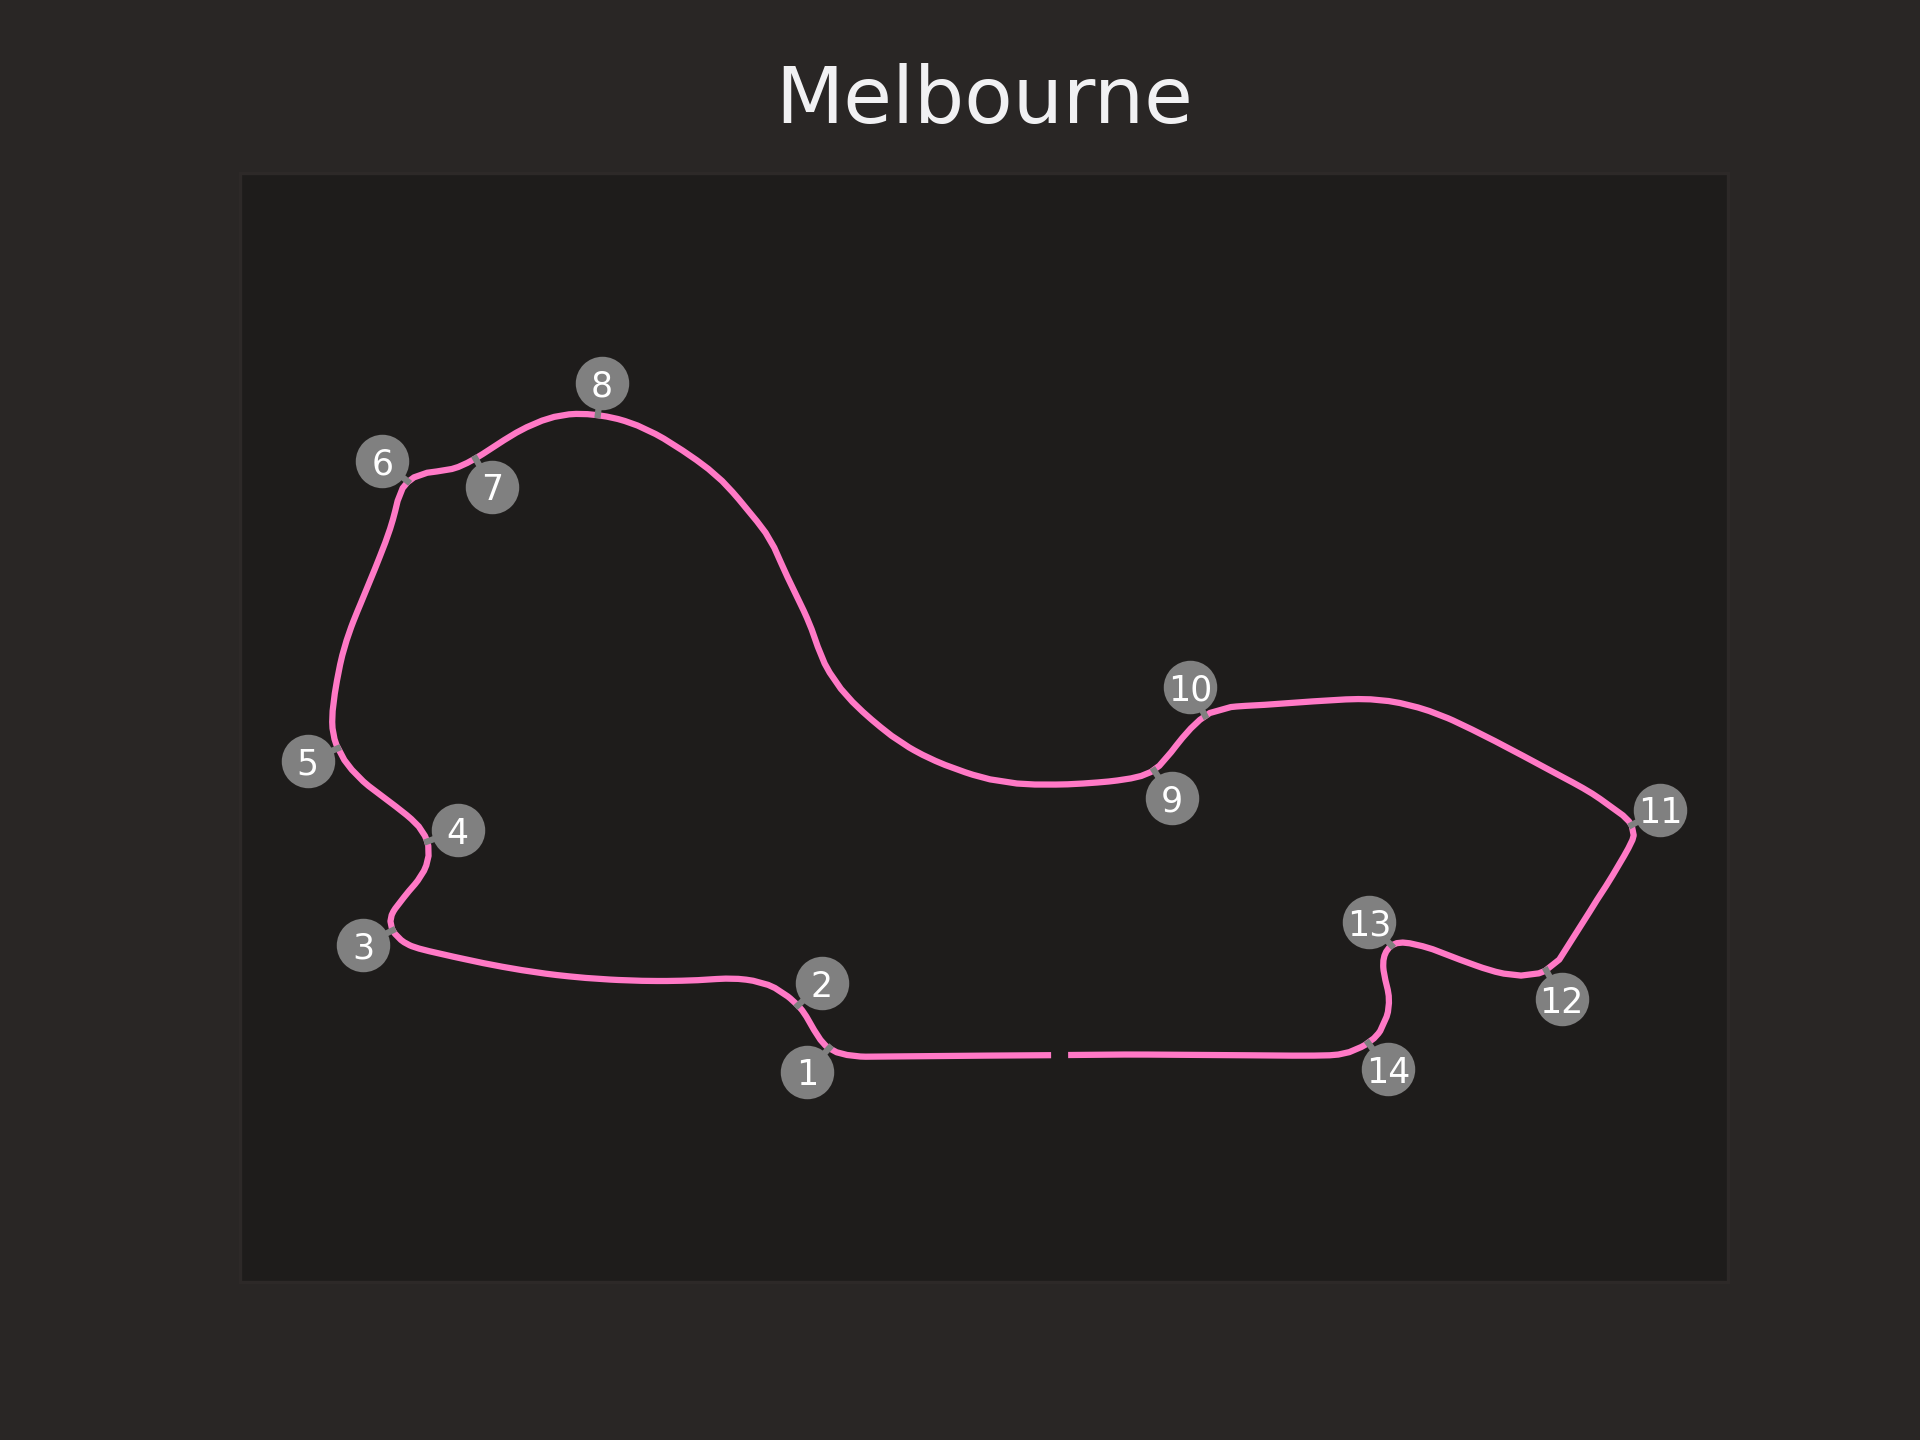

In [109]:
from IPython.display import Image
display(Image(filename="D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/race/info_circuit.png", width=700))

In [122]:
# Seleccionamos la vuelta más rapida de Norris y la telemetria
norris_vuelta = qualy.laps.pick_drivers('NOR').pick_fastest()
norris_tel = norris_vuelta.get_car_data().add_distance()
mclaren_color = fastf1.plotting.get_team_color(norris_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Piastri y la telemetria
pia_vuelta = qualy.laps.pick_drivers('PIA').pick_fastest()
pia_tel = pia_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Verstappen y la telemetria
ver_vuelta = qualy.laps.pick_drivers('VER').pick_fastest()
ver_tel = ver_vuelta.get_car_data().add_distance()
redbull_color = fastf1.plotting.get_team_color(ver_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Russell y la telemetria
rus_vuelta = qualy.laps.pick_drivers('RUS').pick_fastest()
rus_tel = rus_vuelta.get_car_data().add_distance()
mercedes_color = fastf1.plotting.get_team_color(rus_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Tsunoda y la telemetria
tsu_vuelta = qualy.laps.pick_drivers('TSU').pick_fastest()
tsu_tel = tsu_vuelta.get_car_data().add_distance()
rb_color = fastf1.plotting.get_team_color(tsu_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Albon y la telemetria
alb_vuelta = qualy.laps.pick_drivers('ALB').pick_fastest()
alb_tel = alb_vuelta.get_car_data().add_distance()
williams_color = fastf1.plotting.get_team_color(alb_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Leclerc y la telemetria
lec_vuelta = qualy.laps.pick_drivers('LEC').pick_fastest()
lec_tel = lec_vuelta.get_car_data().add_distance()
ferrari_color = fastf1.plotting.get_team_color(lec_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Hamilton y la telemetria
ham_vuelta = qualy.laps.pick_drivers('HAM').pick_fastest()
ham_tel = ham_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Sainz y la telemetria
sai_vuelta = qualy.laps.pick_drivers('SAI').pick_fastest()
sai_tel = sai_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Gasly y la telemetria
gas_vuelta = qualy.laps.pick_drivers('GAS').pick_fastest()
gas_tel = gas_vuelta.get_car_data().add_distance()
alpine_color = fastf1.plotting.get_team_color(gas_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Hadjar y la telemetria
had_vuelta = qualy.laps.pick_drivers('HAD').pick_fastest()
had_tel = had_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Alonso y la telemetria
alo_vuelta = qualy.laps.pick_drivers('ALO').pick_fastest()
alo_tel = alo_vuelta.get_car_data().add_distance()
astonmartin_color = fastf1.plotting.get_team_color(alo_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Doohan y la telemetria
doo_vuelta = qualy.laps.pick_drivers('DOO').pick_fastest()
doo_tel = doo_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Stroll y la telemetria
str_vuelta = qualy.laps.pick_drivers('STR').pick_fastest()
str_tel = str_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Bortoleto y la telemetria
bor_vuelta = qualy.laps.pick_drivers('BOR').pick_fastest()
bor_tel = bor_vuelta.get_car_data().add_distance()
kicksauber_color = fastf1.plotting.get_team_color(bor_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Antonelli y la telemetria
ant_vuelta = qualy.laps.pick_drivers('ANT').pick_fastest()
ant_tel = ant_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Hulkenberg y la telemetria
hul_vuelta = qualy.laps.pick_drivers('HUL').pick_fastest()
hul_tel = hul_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Lawson y la telemetria
law_vuelta = qualy.laps.pick_drivers('LAW').pick_fastest()
law_tel = law_vuelta.get_car_data().add_distance()

# Seleccionamos la vuelta más rapida de Ocon y la telemetria
oco_vuelta = qualy.laps.pick_drivers('OCO').pick_fastest()
oco_tel = oco_vuelta.get_car_data().add_distance()
haas_color = fastf1.plotting.get_team_color(oco_vuelta['Team'], session=qualy)

# Seleccionamos la vuelta más rapida de Bearman y la telemetria
#bea_vuelta = qualy.laps.pick_drivers('BEA').pick_fastest()
#bea_tel = bea_vuelta.get_car_data().add_distance()

# Informacion del circuito
circuit_info = qualy.get_circuit_info()

### Comparación de las vueltas de Norris vs. Verstappen vs. Russell vs. Leclerc

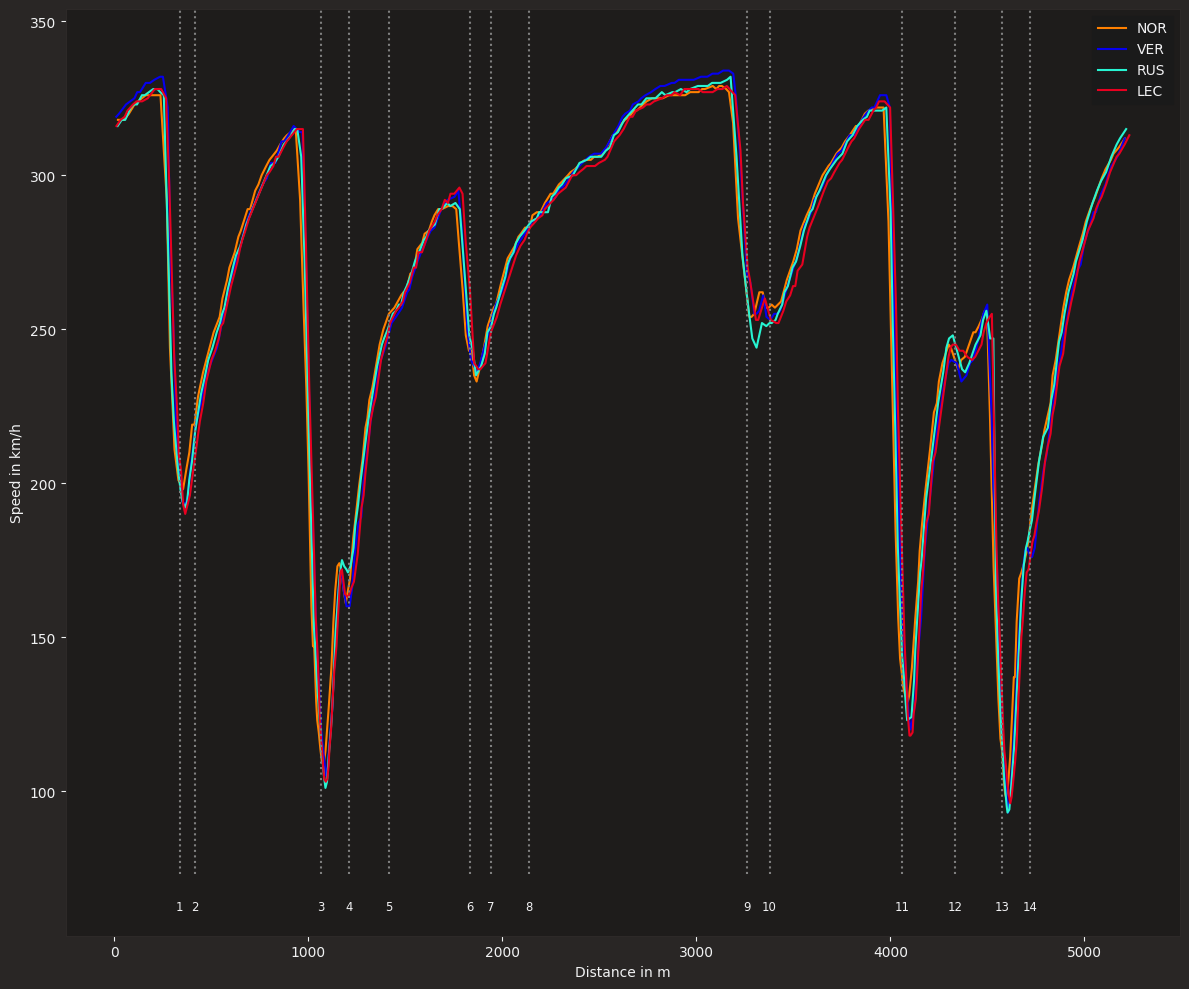

In [127]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 10))

# Agregar la telemetría de Norris
ax.plot(norris_tel['Distance'], norris_tel['Speed'], color=mclaren_color, label=norris_vuelta['Driver'])
# Agregar la telemetría de Verstappen
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=redbull_color, label=ver_vuelta['Driver'])
# Agregar la telemetría de Russell
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mercedes_color, label=rus_vuelta['Driver'])
# Agregar la telemetría de Leclerc
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=ferrari_color, label=lec_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(norris_tel['Speed'].min(), ver_tel['Speed'].min(), rus_tel['Speed'].min(), lec_tel['Speed'].min())
v_max = max(norris_tel['Speed'].max(), ver_tel['Speed'].max(), rus_tel['Speed'].max(), lec_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/NORvsVERvsRUSvsLEC.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Comparacion entre las vueltas más rapidas de los pilotos de McLaren

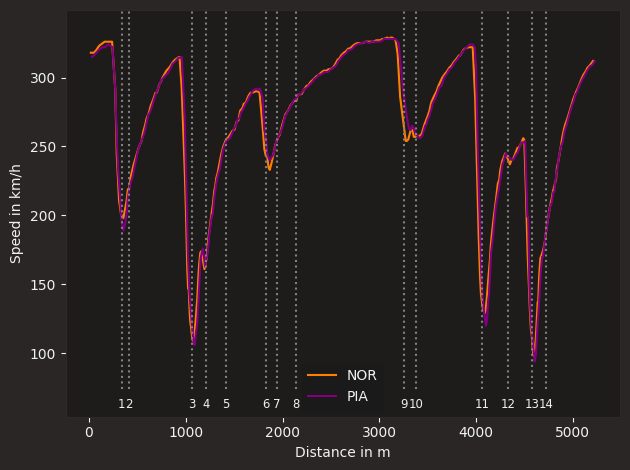

In [128]:
# Crear el gráfico
fig, ax = plt.subplots()

# Agregar la telemetría de Norris
ax.plot(norris_tel['Distance'], norris_tel['Speed'], color=mclaren_color, label=norris_vuelta['Driver'])

# Agregar la telemetría de Piastri
ax.plot(pia_tel['Distance'], pia_tel['Speed'], color="purple", label=pia_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(norris_tel['Speed'].min(), pia_tel['Speed'].min())
v_max = max(norris_tel['Speed'].max(), pia_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/NORvsPIA.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Comparaciones de vuelta de vuelta entre los compañeros de Ferrari

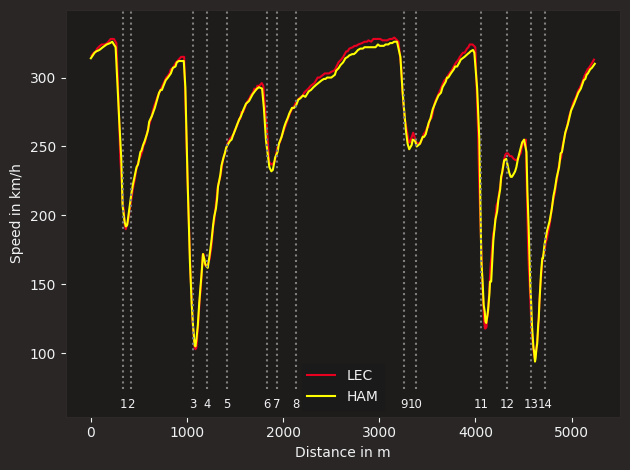

In [129]:
# Crear el gráfico
fig, ax = plt.subplots()

# Agregar la telemetría de Leclerc
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=ferrari_color, label=lec_vuelta['Driver'])

# Agregar la telemetría de Hamilton
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color="yellow", label=ham_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(lec_tel['Speed'].min(), ham_tel['Speed'].min())
v_max = max(lec_tel['Speed'].max(), ham_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2025/01_AUSTRALIA/graphics/qualy/LECvsHAM.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()